### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel("Data_train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
# Change type of datetime features
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [12]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [407]:
# Split into day and month
train_data['journey day'] = train_data['Date_of_Journey'].dt.day
train_data['journey month'] = train_data['Date_of_Journey'].dt.month

In [408]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey day,journey month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-14 05:50:00,2021-08-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-14 18:05:00,2021-08-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-14 16:50:00,2021-08-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [409]:
#drop now Date_of_journey column
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [410]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey day,journey month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-14 05:50:00,2021-08-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-14 18:05:00,2021-08-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-14 16:50:00,2021-08-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


### Data Cleaning and data preprocessing

In [411]:
# We have to clean Dep_time and Arrival_Time

In [412]:
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour

def extract_min(df,col):
    df[col+'_minute'] = df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [413]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [414]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [415]:
# We also have to clean Duration column

In [416]:
duration = list(train_data['Duration']) # convert into list

In [426]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h' + duration[i]

In [427]:
train_data['Duration'] = duration

In [428]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4


In [429]:
'2h 50m'.split(' ')[0][0:-1] # return hour
'2h 50m'.split(' ')[1][0:-1] # return minute

'50'

In [430]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [431]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [432]:
train_data.drop('Duration',axis=1,inplace=True) #drop_column(df,col)

In [433]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey day             int64
journey month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [434]:
data = list(train_data['Duration_hours'])
for i in range(len(data)):
    if data[i] == '0h5':
        train_data['Duration_hours'][i] = '0'

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [435]:
#Convert into int those two columns into int
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [436]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey day             int64
journey month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [437]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [438]:
num_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
num_col

['Price',
 'journey day',
 'journey month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Features Encoding

In [439]:
categorical = train_data[cat_col]
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [440]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

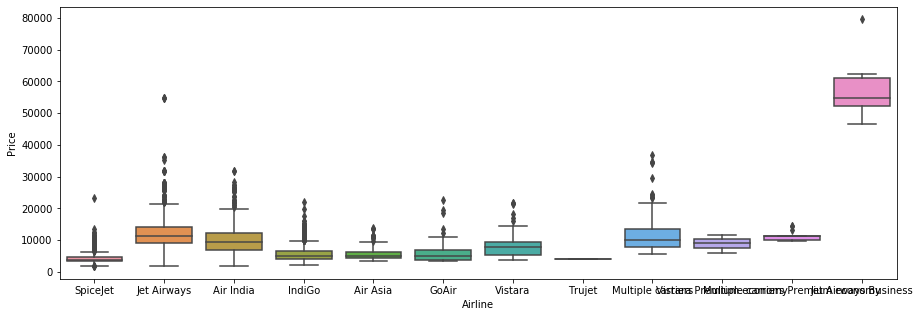

In [441]:
#Distribution of Airline
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=True))

In [442]:
# One hot Encoding of Airline 
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)

In [443]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [444]:
# One hot Encoding of Source 

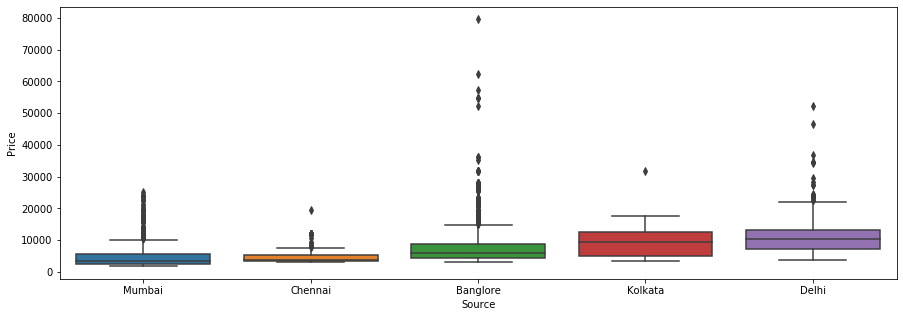

In [445]:
#Distribution of Airline
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=True))

In [446]:
Source = pd.get_dummies(categorical['Source'],drop_first=True)

In [447]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [448]:
# One hot Encoding of Destination 

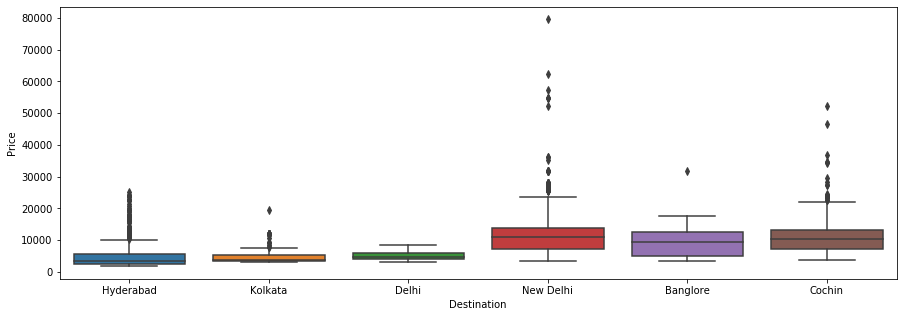

In [449]:
#Distribution of Destination
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=True))

In [450]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)

In [451]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [452]:
#Label Encoding
categorical['Route_0'] = categorical['Route'].str.split('→').str[0]
categorical['Route_1'] = categorical['Route'].str.split('→').str[1]
categorical['Route_2'] = categorical['Route'].str.split('→').str[2]
categorical['Route_3'] = categorical['Route'].str.split('→').str[3]
categorical['Route_4'] = categorical['Route'].str.split('→').str[4]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [453]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_0,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [454]:
drop_column(categorical,'Route')

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [455]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_0                0
Route_1                0
Route_2             3491
Route_3             9116
Route_4            10636
dtype: int64

In [456]:
for i in ['Route_2','Route_3','Route_4']:
    categorical[i].fillna('None',inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [457]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_0            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
dtype: int64

In [458]:
for i in categorical.columns:
    print('{} has {} categories'.format(i,len(categorical[i].value_counts())))

Airline has 12 categories
Source has 5 categories
Destination has 6 categories
Total_Stops has 5 categories
Additional_Info has 10 categories
Route_0 has 5 categories
Route_1 has 45 categories
Route_2 has 30 categories
Route_3 has 14 categories
Route_4 has 6 categories


In [459]:
from sklearn.preprocessing import LabelEncoder

In [460]:
encoder = LabelEncoder()

In [461]:
for i in ['Route_0','Route_1','Route_2','Route_3','Route_4']:
    categorical[i] = encoder.fit_transform(categorical[i])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [462]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_0,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [463]:
# We are going to drop the Additional_Info feature

In [464]:
drop_column(categorical,'Additional_Info')

In [465]:
# Lets perform encoding in the last feature Total_Stops
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [466]:
dict = {'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}

In [467]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [468]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,2,0,34,8,13,5


In [469]:
# Now let's concatenate
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[num_col]],axis=1)

In [470]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,2,34,3,13,5,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,2,0,34,8,13,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [471]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [472]:
pd.set_option('display.max_columns',36)
data_train.head()

,Total_Stops,Route_0,Route_1,Route_2,Route_3,Route_4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey day,journey month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,2,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,2,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [473]:
# Outlier Detection: distribution and boxplot
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

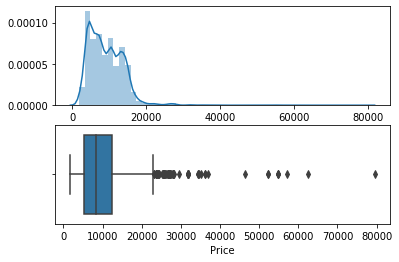

In [474]:
plot(data_train,'Price')

In [475]:
data_train['Price'] = np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

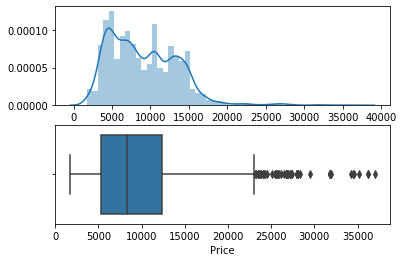

In [476]:
plot(data_train,'Price')

In [477]:
X = data_train.drop('Price',axis=1)
y = data_train['Price']

In [478]:
from sklearn.feature_selection import mutual_info_classif

In [479]:
mutual_info_classif(X,y)

array([2.17477527, 2.02584531, 2.78212638, 2.27463516, 1.49308186,
       0.76467721, 0.77193887, 0.09947416, 0.66701369, 0.92184381,
       0.0080478 , 0.57545527, 0.00360393, 0.32634444, 0.        ,
       0.22786234, 0.        , 0.17366829, 1.51593245, 0.90245184,
       0.28971825, 1.54365014, 0.39068579, 0.30183044, 0.17242669,
       0.37513182, 1.08726236, 0.83359619, 1.43196356, 1.21235168,
       1.84280364, 1.54774792, 1.76594234, 1.07390291])

In [480]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.126444
Route_0,2.060733
Route_1,2.779496
Route_2,2.260467
Route_3,1.461465
Route_4,0.746977
Air India,0.736039
GoAir,0.098138
IndiGo,0.688628
Jet Airways,0.925178


In [481]:
imp.columns = ['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_1,2.779496
Route_2,2.260467
Total_Stops,2.126444
Route_0,2.060733
Arrival_Time_hour,1.859535
Duration_hours,1.761303
Cochin,1.540953
Delhi,1.535072
Arrival_Time_minute,1.509816
Route_3,1.461465


### Apply Machine Learning Algorithm and automate predictions

In [495]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [496]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [500]:
def predict(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are:\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2 score is : {}'.format(r2_score))
    
    print('MAE :',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE : ',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction) #normal distrubtion means model performs good
    
    if dump == 1:
        file = open('model.pkl','wb')
        pickle.dump(model,file)

In [501]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score : 0.9492374536049505
predictions are:
 [12456.18333333  5916.8         3531.05       ... 10583.4
 11807.43333333  3909.2       ]


r2 score is : 0.7919979524180836
MAE : 1228.7764129749262
MSE :  4158492.9840071755
RMSE : 2039.238334282478


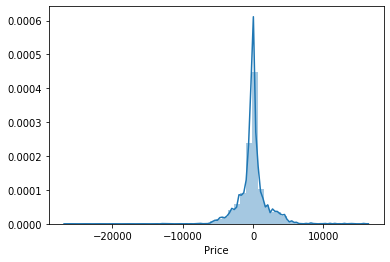

In [502]:
predict(RandomForestRegressor(),1)

In [503]:
# Most of the time, the model the model predict good result , we have have a pick at 0

#### Play with multiple algorithms

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6146672200916163
predictions are:
 [11559.41912863  6140.26655232  3060.47941699 ...  9765.78984092
 11646.96545424  4382.90155679]


r2 score is : 0.60632181081416
MAE : 1986.8308306511972
MSE :  7870633.99960633
RMSE : 2805.4650237716974


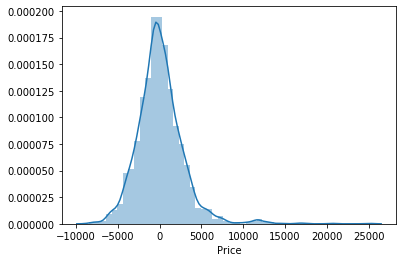

In [505]:
predict(LinearRegression(),0)

Training score : 0.9688174373384578
predictions are:
 [10844.  5636.  3543. ...  8446. 11841.  3841.]


r2 score is : 0.7017974679448844
MAE : 1377.115473405085
MSE :  5961831.394356835
RMSE : 2441.686178516157


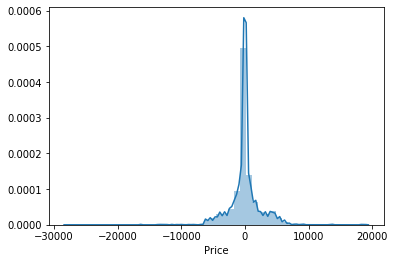

In [507]:
predict(DecisionTreeRegressor(),0)

Training score : 0.7826487292593736
predictions are:
 [12586.6  6164.8  6929.4 ... 12252.6 11789.2  3977.4]


r2 score is : 0.6538548418335774
MAE : 1757.5898923724847
MSE :  6920327.123781
RMSE : 2630.65146375969


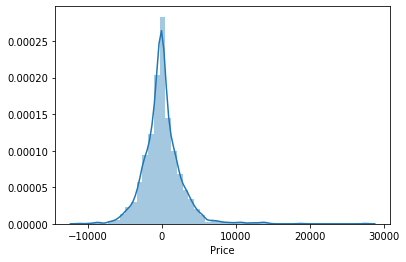

In [508]:
predict(KNeighborsRegressor(),0)

#### Hypertune our model

In [1]:
from sklearn.model_selection import RandomizedSearchCV

In [2]:
reg_rf = RandomForestRegressor()

NameError: name 'RandomForestRegressor' is not defined

In [513]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [520]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,20]
}

In [521]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [522]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [523]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [524]:
prediction = rf_random.predict(X_test)

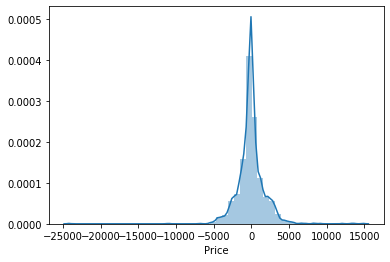

In [525]:
sns.distplot(y_test-prediction)

In [526]:
metrics.r2_score(y_test,prediction)

0.83552149213667

In [529]:
# Save our best model
file = open('rf_random.pkl','wb')
pickle.dump(rf_random,file)

In [530]:
# Open model

In [535]:
model = open('rf_random.pkl','rb')
forest = pickle.load(model)

In [538]:
predictions = forest.predict(X_test)

In [539]:
metrics.r2_score(y_test,predictions)

0.83552149213667